In [4]:
import pandas as pd

# Load both files
mat = pd.read_excel("student-mat.xlsx")
por = pd.read_excel("student-por.xlsx")

print("MAT shape:", mat.shape)
print("POR shape:", por.shape)

# (Optional) add subject column to show you know what you're doing
mat["subject"] = "math"
por["subject"] = "portuguese"

# Combine rows (stack)
df = pd.concat([mat, por], ignore_index=True)

print("Combined shape:", df.shape)
df.head()


MAT shape: (395, 33)
POR shape: (649, 33)
Combined shape: (1044, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


In [5]:
#  Target: at-risk if final grade < 10
df["at_risk"] = (df["G3"] < 10).astype(int)

df["at_risk"].value_counts()


at_risk
0    814
1    230
Name: count, dtype: int64

In [6]:
df.to_csv("student-all.csv", index=False)
print("Saved to student-all.csv")


Saved to student-all.csv


In [7]:
import pandas as pd

df = pd.read_csv("student-all.csv")
df.shape, df.head()


((1044, 35),
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   goout Dalc  Walc  health  absences  G1  G2  G3 subject at_risk  
 0     4    1     1       3         6   5   6   6    math       1  
 1     3    1     1       3         4   5   5   6    math       1  
 2     2    2     3       3        10   7   8  10    math       0  
 3     2    1     1       5         2  15  14  15    math       0  
 4     2    1     2       5         4   6  10  10    math       0  
 
 [5 rows x 35 columns])

In [8]:
drop_cols = ["G3", "school", "reason", "guardian"]
df = df.drop(columns=drop_cols)


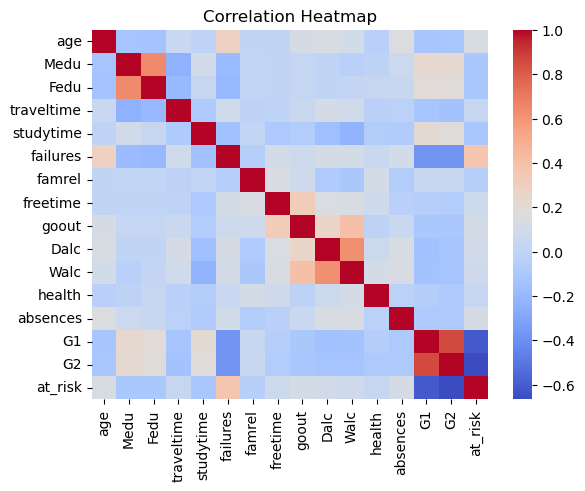

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include="number")
sns.heatmap(num_cols.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Features with weak correlation to the target were removed


In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 1) Define X and y (drop leakage!)
X = df.drop(columns=["at_risk", "G3"], errors="ignore")
y = df["at_risk"]

# 2) One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# 3) Train
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# 4) Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)


G2                    0.380364
G1                    0.208052
failures              0.045195
absences              0.033481
goout                 0.023010
subject_portuguese    0.022802
age                   0.021428
Walc                  0.018136
Fedu                  0.017415
freetime              0.016696
dtype: float64

In [12]:
df["support_level"] = (
    (df["schoolsup"] == "yes").astype(int) +
    (df["famsup"] == "yes").astype(int)
)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Missing count + percentage
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)

missing_pct = (missing / len(df) * 100).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_pct
})

print("Missing values summary:")
display(missing_table)

# Plot missing values (if any)
if not missing_table.empty:
    missing_table["missing_count"].plot(kind="bar")
    plt.title("Missing Values by Column")
    plt.xlabel("Columns")
    plt.ylabel("Missing Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print(" No missing values found.")


Missing values summary:


,missing_count,missing_pct


 No missing values found.


Outlier summary (IQR):


,column,outlier_count,outlier_pct,lower_bound,upper_bound
5,failures,183,17.53,0.0,0.0
6,famrel,77,7.38,2.5,6.5
7,freetime,64,6.13,1.5,5.5
4,studytime,62,5.94,-0.5,3.5
12,absences,54,5.17,-9.0,15.0
9,Dalc,52,4.98,-0.5,3.5
3,traveltime,24,2.30,-0.5,3.5
14,G2,20,1.92,3.0,19.0
0,age,2,0.19,13.0,21.0
13,G1,1,0.10,3.0,19.0


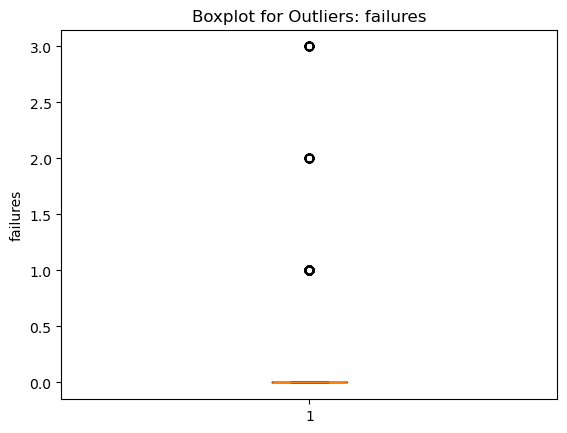

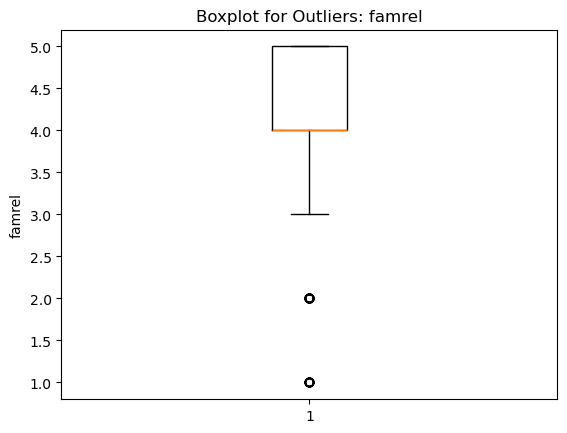

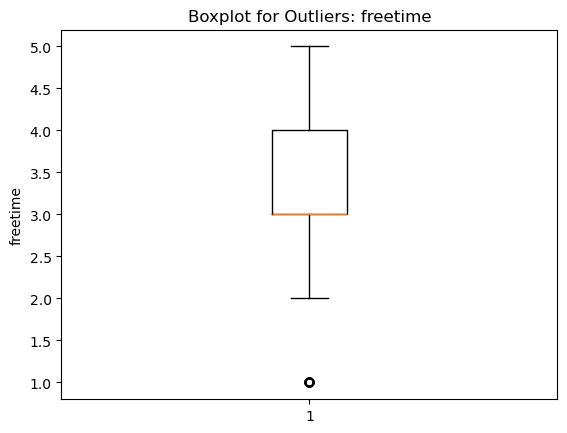

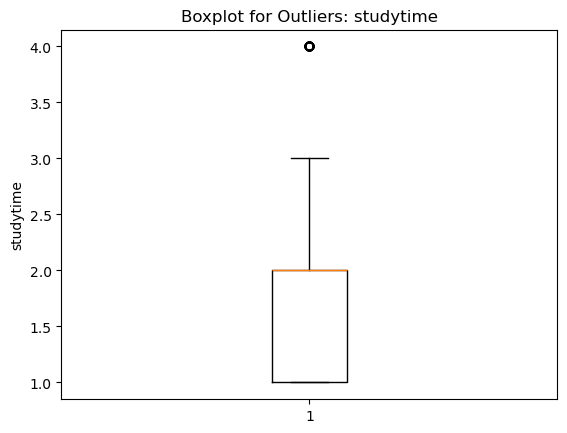

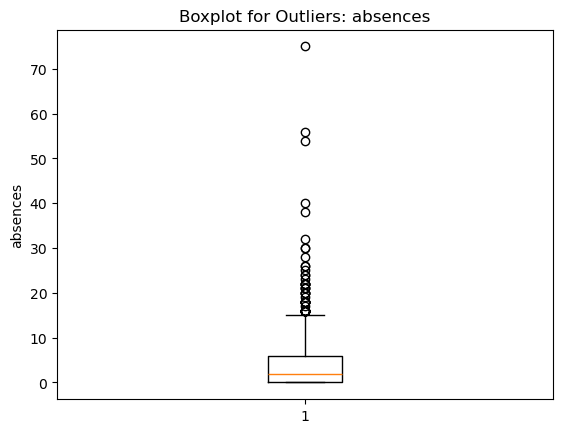

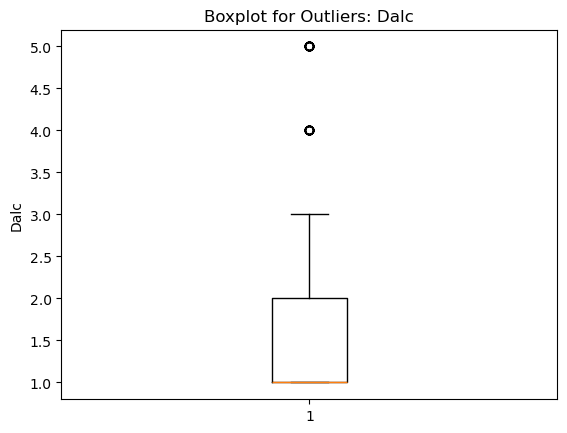

In [15]:
import numpy as np
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include="number").columns

# (Optional) remove target/label cols from outlier check
exclude_cols = {"at_risk"}  # add "G3" if still inside df
cols_to_check = [c for c in numeric_cols if c not in exclude_cols]

outlier_summary = []

for col in cols_to_check:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_summary.append({
        "column": col,
        "outlier_count": outliers.shape[0],
        "outlier_pct": round(outliers.shape[0] / len(df) * 100, 2),
        "lower_bound": lower,
        "upper_bound": upper
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values("outlier_count", ascending=False)
print("Outlier summary (IQR):")
display(outlier_df)

# Boxplots for top 6 most outlier-heavy numeric columns
top_cols = outlier_df[outlier_df["outlier_count"] > 0]["column"].head(6).tolist()

if top_cols:
    for col in top_cols:
        plt.figure()
        plt.boxplot(df[col].dropna())
        plt.title(f"Boxplot for Outliers: {col}")
        plt.ylabel(col)
        plt.show()
else:
    print("✅ No outliers detected by IQR in numeric columns.")
